In [25]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

In [26]:
class system_parameters:
    def __init__(self, r_star, r_planet, period, inclination, semi):
        #Taking inputs and initializing the required parameters for plotting the light curve for the system.
        self.r_s= r_star
        self.r_p= r_planet
        self.P=period
        self.i=inclination
        self.a= semi*215.032 #from au to solar radii
        self.Delta()
        self.total_time()
        self.time_f()
        self.impact()
        
    def Delta(self):
        #Function to calculate delta
        self.delta= (self.r_p/self.r_s)**2
        
    def total_time(self):
        #Function to calculate the ratio of total transit time and period
        self.t_T= ((self.P/np.pi*(self.r_s/self.a))*np.sqrt((1+self.delta)**2-(self.a*np.cos(np.deg2rad(self.i))/self.r_s)**2))/self.P
        
    def time_f(self):
        #Function to calculate tf/P 
        self.t_f=self.t_T*np.sqrt((1-self.delta)**2-(self.a*np.cos(np.deg2rad(self.i))/self.r_s)**2)/np.sqrt((1+self.delta)**2-(self.a*np.cos(np.deg2rad(self.i))/self.r_s)**2)
    
    def impact(self):
        #Function to calculate b
        self.b= (self.a/self.r_s)*np.cos(np.deg2rad(self.i))
    
    def parameters(self):
        print(self.r_s,self.r_p,self.P,self.i,self.a,self.delta,self.t_T,self.t_f, self.b)

In [27]:
#Using the parameters of HD1397
test= system_parameters(2.336,0.1026,11.53,88.9,0.1097)
test.parameters()

2.336 0.1026 11.53 88.9 23.589010400000003 0.0019290746974103962 0.030985969347740717 0.030862001212000376 0.1938564505221233


In [28]:
def fun(tT,tf,d,m, x):
    #Function to define a piece-wisely defined function for the light curve.
    y=[]
    for i in range(len(x)):
        if x[i]<(0.5-tT/2):
            y.append(1)
        elif (0.5-tT/2)<=x[i]<(0.5-tf/2):
            y.append(-m*x[i]+1+m*(0.5-tT/2))
        elif (0.5-tf/2)<=x[i]<(0.5+tf/2):
            y.append(1-d)
        elif (0.5+tf/2)<=x[i]<(0.5+tT/2):
            y.append(m*x[i]+1-m*(0.5+tT/2))
        elif x[i]>=(0.5+tT/2):
            y.append(1)
    
    arr=np.array(y)
    
    return arr
    

In [47]:
def light_curve(system):
    #Function to plot the light curve based on the piece-wisely defined function.
    new_lum= 1-system.delta
    trans_time= (system.t_T-system.t_f)/2
    m= (system.delta)/trans_time
    
    x = np.linspace(0,1, 50000)
    y = fun(system.t_T,system.t_f,system.delta,m,x)
    
    #Plotting
    plt.plot(x,y)
    plt.xlabel("t/P")
    plt.ylabel("L/L_star")
    plt.xlim(0.4,0.6)
    plt.ylim(0.994,1.001)
    

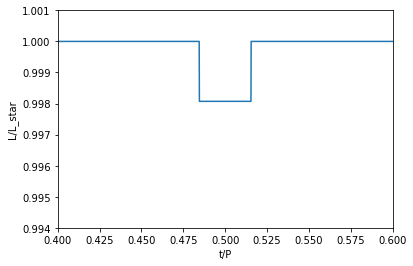

In [48]:
light_curve(test)

In [56]:
def limb():
    #Function to plot relative intensity as a function of angle.
    u= 0.65 #sun
    x= np.linspace(0,90, 100)
    rel_intensity= 1-u*(1-np.cos(np.deg2rad(x)))
    plt.plot(x, rel_intensity)
    plt.xlim(0,100)
    plt.xlabel("theta (deg)")
    plt.ylabel("Relative intensity")
    plt.title("Stellar limb darkening")
    

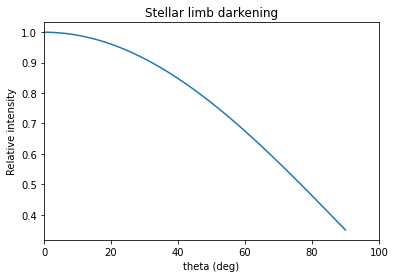

In [57]:
limb()